In [1]:
import numpy as np
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import MultinomialNB


In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
df.age=df.age.astype('int32')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
df.isna().sum()


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
df.duplicated().sum()


0

In [6]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
df.drop(columns='id',inplace=True)


In [8]:
df.describe()


,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,42.854145,0.091872,0.049501,105.305150,28.893237,0.042575
std,22.575986,0.288875,0.216934,44.424341,7.854067,0.201917
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.070000,23.500000,0.000000
50%,44.000000,0.000000,0.000000,91.680000,28.100000,0.000000
75%,60.000000,0.000000,0.000000,113.570000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [9]:
df.gender.value_counts()


gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [10]:
df=df[df['gender']!='Other']
x=df.gender.value_counts()
print(x)

gender
Female    2897
Male      2011
Name: count, dtype: int64


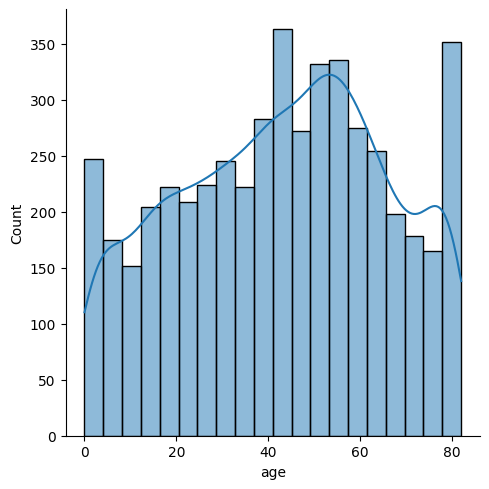

In [11]:
sns.displot(df['age'], kde =True)

In [12]:

lb=LabelEncoder()
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [13]:
df.avg_glucose_level=df['avg_glucose_level'].astype('int64')
df.bmi=df['bmi'].astype('int64')

C:\Users\nhokc\AppData\Local\Temp\ipykernel_15616\2613422852.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.avg_glucose_level=df['avg_glucose_level'].astype('int64')
C:\Users\nhokc\AppData\Local\Temp\ipykernel_15616\2613422852.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.bmi=df['bmi'].astype('int64')


In [14]:
df["gender"]=lb.fit_transform(df["gender"])
df["ever_married"]=lb.fit_transform(df["ever_married"])
df["work_type"]=lb.fit_transform(df["work_type"])
df["Residence_type"]=lb.fit_transform(df["Residence_type"])
df["smoking_status"]=lb.fit_transform(df["smoking_status"])
df.head()

C:\Users\nhokc\AppData\Local\Temp\ipykernel_15616\414558828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["gender"]=lb.fit_transform(df["gender"])
C:\Users\nhokc\AppData\Local\Temp\ipykernel_15616\414558828.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["ever_married"]=lb.fit_transform(df["ever_married"])
C:\Users\nhokc\AppData\Local\Temp\ipykernel_15616\414558828.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,1,228,36,1,1
2,1,80,0,1,1,2,0,105,32,2,1
3,0,49,0,0,1,2,1,171,34,3,1
4,0,79,1,0,1,3,0,174,24,2,1
5,1,81,0,0,1,2,1,186,29,1,1


In [15]:
features=['gender',
          'age',
          'hypertension',
          'heart_disease',
          'ever_married',
          'work_type',
          'Residence_type',
          'avg_glucose_level',
          'bmi',
          'smoking_status' ]
target=['stroke']

x=df[features]
y=df[target]

print(x)
print(y)

      gender  age  hypertension  heart_disease  ever_married  work_type  \
0          1   67             0              1             1          2   
2          1   80             0              1             1          2   
3          0   49             0              0             1          2   
4          0   79             1              0             1          3   
5          1   81             0              0             1          2   
...      ...  ...           ...            ...           ...        ...   
5104       0   13             0              0             0          4   
5106       0   81             0              0             1          3   
5107       0   35             0              0             1          3   
5108       1   51             0              0             1          2   
5109       0   44             0              0             1          0   

      Residence_type  avg_glucose_level  bmi  smoking_status  
0                  1                

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [17]:
x=df.drop(['stroke'],axis=1)
y=df['stroke']

In [18]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
reg_model = DecisionTreeClassifier()

In [19]:
model=MultinomialNB()

In [20]:
model=model.fit(x_train,y_train)

c:\Users\nhokc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create a Decision Tree classifier
dt_model = DecisionTreeClassifier()

# Fit the model on the training data
dt_model.fit(x_train, y_train)

# Predict on the test data
y_pred = dt_model.predict(x_test)

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       939
           1       0.11      0.09      0.10        43

    accuracy                           0.93       982
   macro avg       0.53      0.53      0.53       982
weighted avg       0.92      0.93      0.92       982



In [22]:
print("Độ chính xác của mô hình: ", model.score(x_test, y_test)*100,"%")

Độ chính xác của mô hình:  82.4847250509165 %


In [23]:
model = MultinomialNB()
model.fit(x_train, y_train)

# Đường dẫn và tên tệp để lưu mô hình
model_filename = 'decision_tree_model.joblib'

# Lưu mô hình vào tệp joblib
joblib.dump(model, model_filename)

c:\Users\nhokc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


['decision_tree_model.joblib']